<a href="https://colab.research.google.com/github/omaralsabbah/Python-/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing needed libraries for EDA 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# importing the dataset
path="/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=pd.read_csv(path)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#to look at all columns names as a table 
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe() # showing numerical columns only 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='O').T #showing categorical features stats

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


'TotalCharges' columns is treated as object although it should be numeric , after investigating the values from previous tables I found that some cells included spaces 

In [ ]:
print(df[df['TotalCharges']==' '][['TotalCharges']])
print('Number of empty cells:',len(df[df['TotalCharges']==' ']))

     TotalCharges
488              
753              
936              
1082             
1340             
3331             
3826             
4380             
5218             
6670             
6754             
Number of empty cells: 11


In [ ]:
#changing the type to numeric and replacing spaces with NaN
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df[['TotalCharges']].isnull().sum()

TotalCharges    11
dtype: int64

In [ ]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

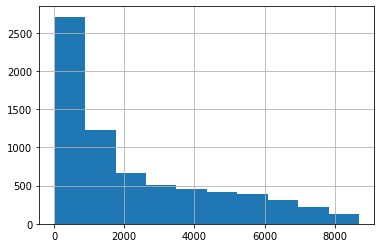

In [ ]:
#imputing the missing values 
df['TotalCharges'].hist()
plt.show()

In [ ]:
#I will replace the missing values in this column with median 

df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isnull().sum()

0

In [ ]:
#some cleaning for the columns names to make it easier to use them 
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

EDA part to investigate characteristics and relations between the features and correlations.

In [ ]:
#Target variable (Churn) count and percentages 
df['churn'].value_counts(normalize=True)


No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [ ]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

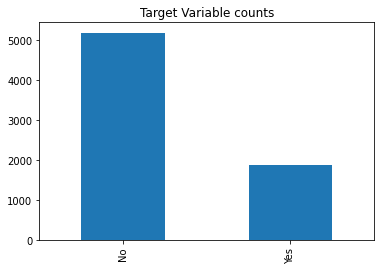

In [ ]:
df['churn'].value_counts().plot(kind='bar',title='Target Variable counts')


1/the target variable is imbalanced , this should be taken into consideration in building models and analysis and will affect model efficiency 

2/the accuracy measure will not be enough alone to evaluate the model, we will need other measures 

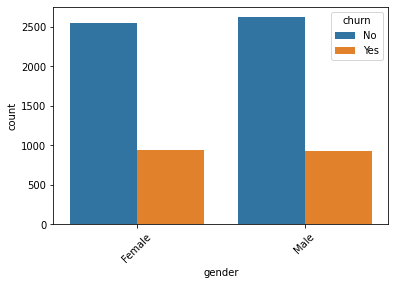

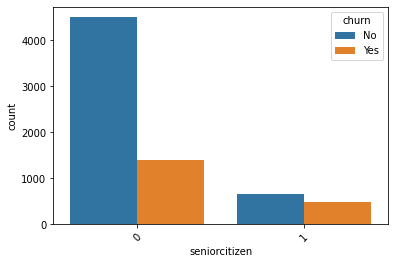

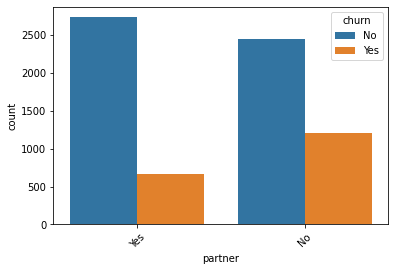

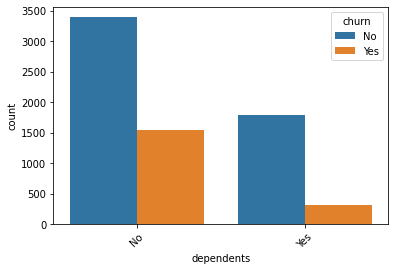

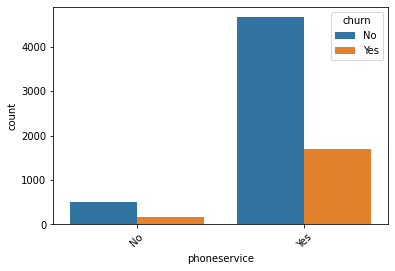

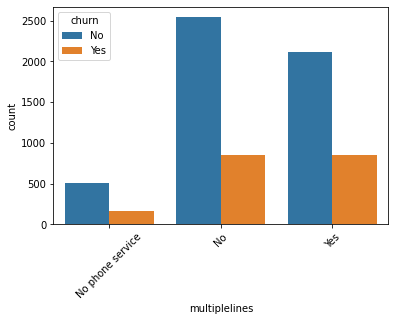

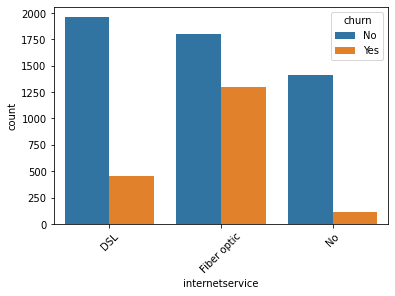

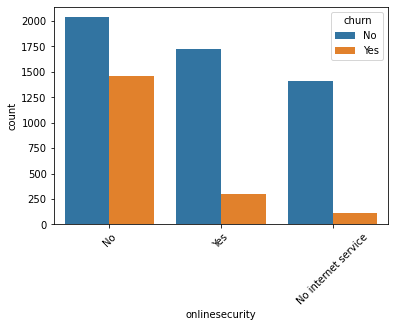

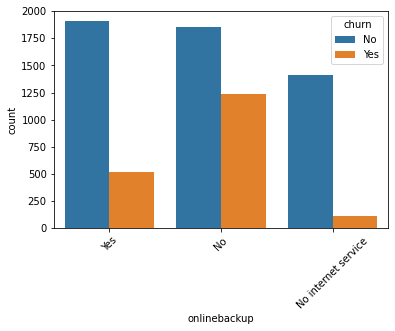

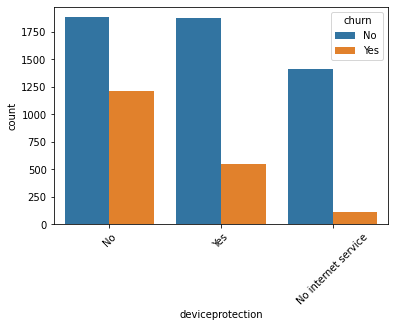

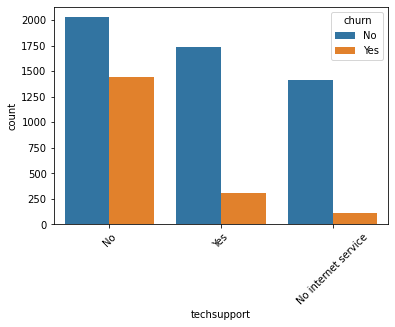

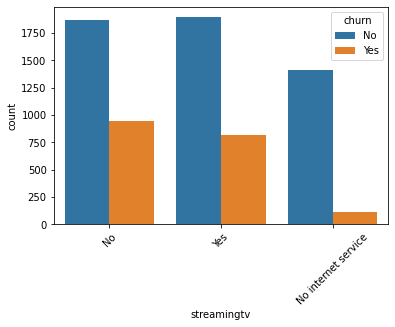

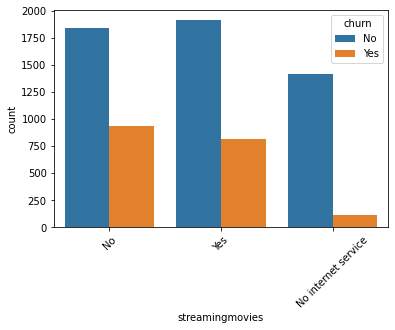

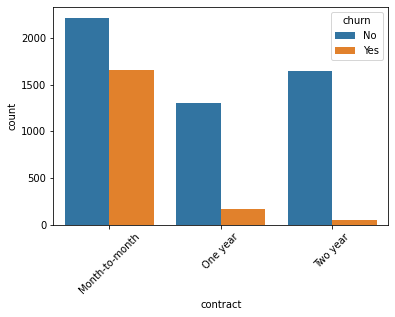

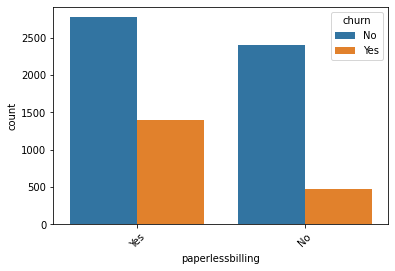

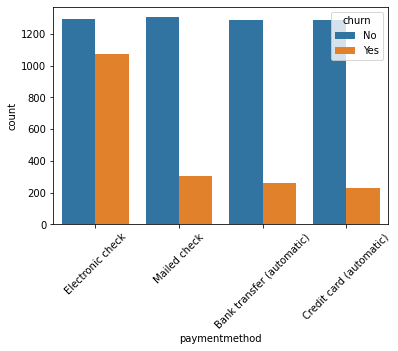

In [ ]:
#EDA and relations between categorical variables and the target variable 
for i, variable in enumerate(df.columns.drop(['churn','totalcharges','monthlycharges','tenure','customerid'])):
  plt.figure(i)
  sns.countplot(data=df,x=df[variable],hue='churn',)
  plt.xticks(rotation=45)

**Data preprocessing** 

In [ ]:
#converting the target columns to 0, 1 instead of yes or no 
df['churn']=df['churn'].replace('No',0)
df['churn']=df['churn'].replace('Yes',1)
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [ ]:
Categorical=df.columns.drop(['churn','totalcharges','monthlycharges','tenure','customerid'])
Numerical=df.columns.drop(Categorical)


In [ ]:
Categorical

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [ ]:
Numerical=Numerical.drop(['customerid','churn'])
Numerical

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [ ]:
df[Categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
#handling categorical variables ( encoding )
df=df.drop('customerid',axis=1)
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
#investigating correlations between variables 
corr=df_encoded.corr()
corr

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
seniorcitizen,1.000000,0.016567,0.220173,0.102652,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
monthlycharges,0.220173,0.247900,1.000000,0.650864,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
totalcharges,0.102652,0.825464,0.650864,1.000000,-0.199037,-0.000002,0.318364,0.063593,0.113013,-0.113013,...,-0.374706,0.515279,-0.374706,0.519884,0.170649,0.356226,0.158055,0.182745,-0.059971,-0.294814
churn,0.150889,-0.352229,0.193356,-0.199037,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,-0.000002,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
partner_Yes,0.016479,0.379697,0.096848,0.318364,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
dependents_Yes,-0.211185,0.159712,-0.113890,0.063593,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
phoneservice_Yes,0.008576,0.008448,0.247398,0.113013,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
multiplelines_No phone service,-0.008576,-0.008448,-0.247398,-0.113013,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


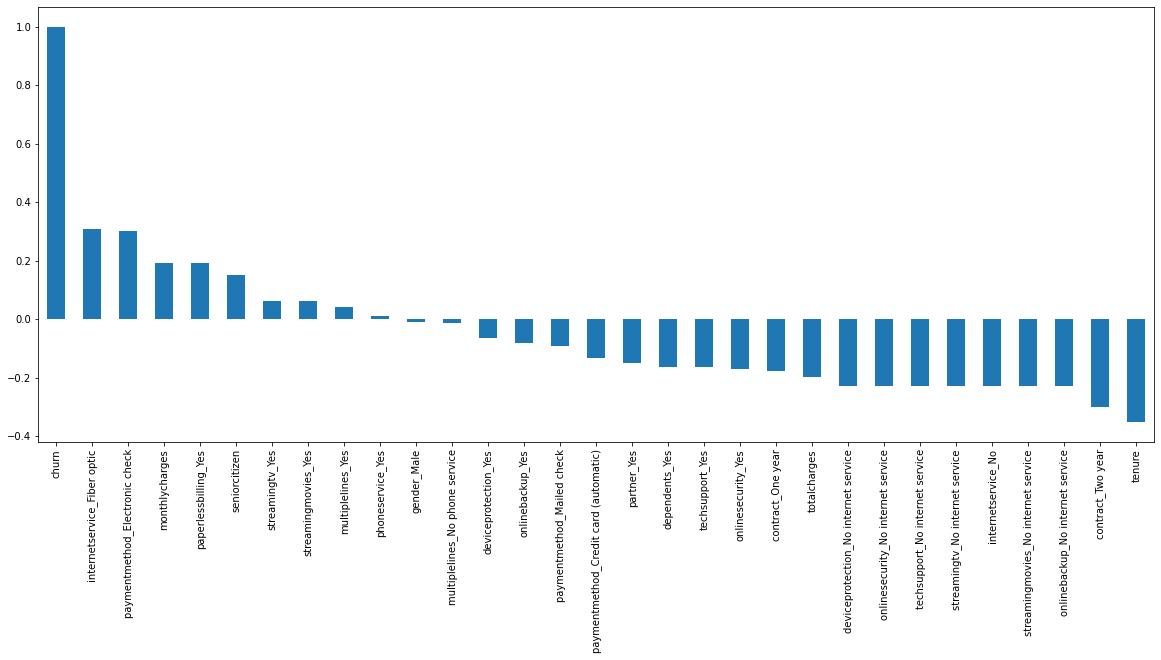

In [ ]:
plt.figure(figsize=(20,8))
corr['churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

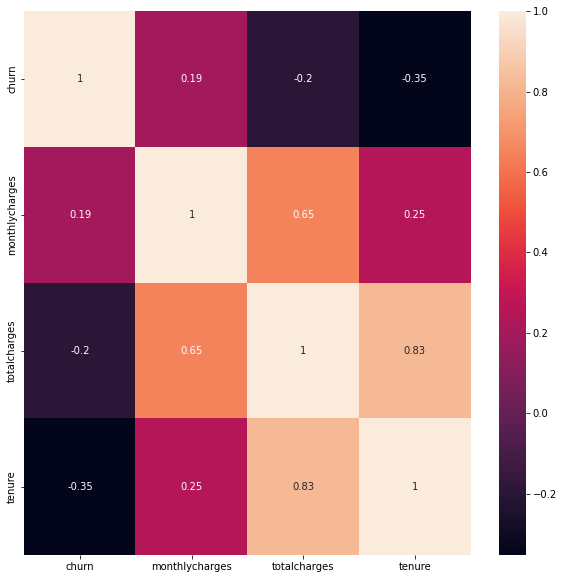

In [ ]:
#correlations between numerical values and the target variable
plt.figure(figsize=(10,10))
sns.heatmap(data=df_encoded[['churn','monthlycharges','totalcharges','tenure']].corr(),annot=True)
plt.show()

In [ ]:
#splitting data and scaling numerical variables 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df_encoded.drop('churn',axis=1)
y=df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

y_test.shape, X_test.shape

((1409,), (1409, 30))

In [ ]:
scaler=StandardScaler()
X_train[Numerical]=scaler.fit_transform(X_train[Numerical])
X_test[Numerical]=scaler.transform(X_test[Numerical])


Building the model 

our probelm is a classification problem as our target is a binary target ( Yes or No ) ( 0 or 1 ) 
I am going to examine more than one classification ML model and continue with the one with best results  

In [ ]:
#importing needed libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#applying logistic regression model
LR = LogisticRegression(random_state=1)
LR.fit(X_train,y_train)
y_pred1=LR.predict(X_test)


In [ ]:
#evaluating first model
print("Accuracy Score =",accuracy_score(y_test,y_pred1))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred1))

print(classification_report(y_test,y_pred1,labels=[0,1]))

Accuracy Score = 0.8055358410220014
confusion matrix:
 [[927 108]
 [166 208]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
#applying KNN model

KNN=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
KNN.fit(X_train, y_train)
y_pred2=KNN.predict(X_test)


In [ ]:
#evaluating 2nd model
print("Accuracy Score =",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred2))

print(classification_report(y_test,y_pred2,labels=[0,1]))

Accuracy Score = 0.7792760823278921
confusion matrix:
 [[889 146]
 [165 209]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.56      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
#applying random forest model

RF=RandomForestClassifier(random_state=1)
RF.fit(X_train,y_train)
y_pred3=RF.predict(X_test)

In [ ]:
#evaluating 2nd model
print("Accuracy Score =",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred3))

print(classification_report(y_test,y_pred3,labels=[0,1]))

Accuracy Score = 0.7842441447835344
confusion matrix:
 [[922 113]
 [191 183]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



*Models are performing well in predicting the 0 class ( no chrun ) but are not giving good results in predicting the other class , this is the problem in an imbalanced sample with binary target, as I mentioned before our sample is Imbalanced with the following percentages:
( 0  :73%  &  1: 27%)

*so as a solution to this probelm I will process my samples in a way to mitigate this imbalance and help the models learn from the training sets and perform better as a result 

1/ Random oversampling

2/SMOTE; Synthetic Minority Oversampling Technique

The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.

In [ ]:
from imblearn.combine import SMOTEENN

sm=SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.20,stratify=y_resampled)

In [ ]:
#Now I will re apply the models on the new samples 

#random forest 

RF2 = RandomForestClassifier(random_state=1)
RF2.fit(Xr_train, yr_train)
y_pred_re=RF2.predict(Xr_test)



In [ ]:
#evaluating RF2 model
print("Accuracy Score =",accuracy_score(yr_test,y_pred_re))
print("confusion matrix:\n",confusion_matrix(yr_test,y_pred_re))

print(classification_report(yr_test,y_pred_re,labels=[0,1]))

Accuracy Score = 0.9462272333044233
confusion matrix:
 [[489  42]
 [ 20 602]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       531
           1       0.93      0.97      0.95       622

    accuracy                           0.95      1153
   macro avg       0.95      0.94      0.95      1153
weighted avg       0.95      0.95      0.95      1153



After doing the resampling the accuracy and all results imporved significantly 

In [ ]:
#applying logisitc regression again on the new sample to compare results 

LR2 = LogisticRegression(solver='lbfgs',max_iter=1000,random_state=1)
LR2.fit(Xr_train,yr_train)
y_pred_re2=LR2.predict(Xr_test)

In [ ]:
#evaluating the LR2 model

print("Accuracy Score =",accuracy_score(yr_test,y_pred_re2))
print("confusion matrix:\n",confusion_matrix(yr_test,y_pred_re2))

print(classification_report(yr_test,y_pred_re2,labels=[0,1]))

Accuracy Score = 0.9340849956634866
confusion matrix:
 [[484  47]
 [ 29 593]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       531
           1       0.93      0.95      0.94       622

    accuracy                           0.93      1153
   macro avg       0.94      0.93      0.93      1153
weighted avg       0.93      0.93      0.93      1153



After the modifications done to the data sets and resampling Random Forest model shows the best result among the used models and it is very reliable overall.